<a href="https://colab.research.google.com/github/TristanPartida/EDP-I/blob/main/series%20de%20fourlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación del calor

Nuestra función esta definida por:


$$
f(x) =
\begin{cases}
0 & \text{si } -2 \leq x < 0 \\
2-x & \text{si } 0 \leq x \leq 2
\end{cases}
$$





Con eso, obtenemos la siguiente serie:


$$g(x)=\frac{1}{2}+\frac{2}{\pi^2}\sum_{n=1}^{\infty}(\frac{2(1-(-1)^n)}{(n\pi)^2} \cos(\frac{n\pi(x)}{2})- \frac{-2}{n\pi}  \sin(\frac{n\pi(x)}{2})).$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if i  < len(x)/2:
          y[i] = 0 * x[i]
        else:
          y[i] = 2 - x[i]
    return y

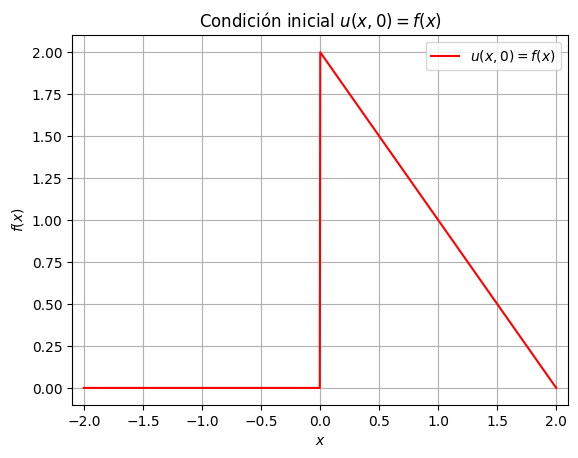

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función a trozos
def f(x):
    return np.piecewise(x, [(-2 <= x) & (x < 0), (0 <= x) & (x <= 2)], [0, lambda x: 2 - x])

# Crear valores de x en el intervalo adecuado
x = np.linspace(-2, 2, 1000)

# Evaluar la función
f_values = f(x)

# Graficar la condición inicial
plt.plot(x, f_values, label='$u(x,0)=f(x)$', color='r')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial $u(x,0)=f(x)$")
plt.xlim([-2.1, 2.1])
plt.ylim([-0.1, 2.1])
plt.grid()
plt.legend()
plt.show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += ((1-(-1)**n)/n**2)*cos(n*pi*x/2)-pi/n*sin(n*pi*x/2)
    return (2/pi**2)*f+1/2

Entre mayores numeros agregues a N se va convirtiendo en una recta

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

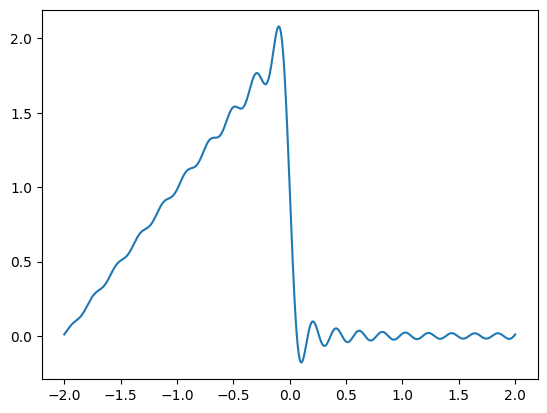

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f(x)$ con $N=20$')
plot(x,f,label='$g(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Función definida a trozos y Serie de Fourier de la misma")
xlim([-2.01,2.1]),ylim([-2.01,2.2]),grid(),legend()
show()

es para grtaficar dos funciones,una es la aproximacion de la condicion inicial fN(X) CON N=20 Y La otra es funcion f(x)= que presenta condicion original inicial

intenta graficar diferentes aproximaciomnes a la condicion inicial u0(x) para valores N  en un rango especifico, con incrementos de 5


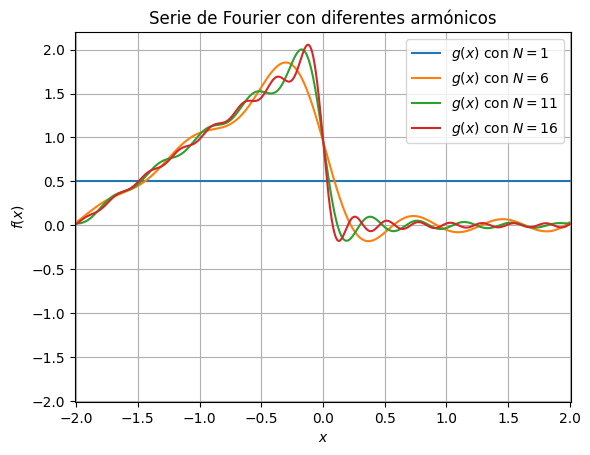

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$g(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Serie de Fourier con diferentes armónicos")
xlim([-2.01,2.01]),ylim([-2.01,2.2]),grid(),legend()
show()